# 프로젝트 개요
- 강의명 : (산대특)_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 빅데이터 시스템 구축
- 프로젝트 주제 : PySpark 설치 및 Spark를 활용한 머신러닝 개발
- 프로젝트 마감일 : 2022년 11월 17일 목요일
- 수강생명 : 황지훈

---

## Step 1. PySpark 설치
- PySpark를 설치하는 코드를 작성한다. 
  + 조건 1. JAVA 설치
  + 조건 2. Spark 설치 (Spark 3.2.0 버전)
    * 참조 : https://spark.apache.org/downloads.html
  + 조건 3. 환경변수
  + 조건 4. PySpark 라이브러리 불러오기

- JAVA, Spark 설치 후 환경변수 설정

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.0-bin-hadoop3.2'

- PySpark 설치 후 라이브러리 불러오기

In [ ]:
!pip install pyspark==3.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 198 kB 65.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805913 sha256=6daee409205daf343a85304959d6df044d0b12f86000468047ec095118c03fa1
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pyspark 
print(pyspark.__version__)

3.2.0


---

## Step 2. Spark 세션 생성 작성
- Spark 세션을 생성하는 코드를 작성한다. 
  + 조건 1. master: local[1]
  + 조건 2. appName: human
  + 조건 3. spark 버전 확인

In [ ]:
from pyspark.sql import SparkSession
myspark = SparkSession.builder.master('local[1]').appName('human').getOrCreate()
print(myspark.version)

3.2.0


---

## Step 3. 구글 드라이브 연동 및 파일 확인
- 구글 드라이브에 data 폴더와 연동하여 실제 데이터가 존재하는지 출력한다. 
  + 처음 4개만 출력한다. 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/산대특/961027hjh/data/"

# 데이터 4개만 출력하기
flights = myspark.read.csv(DATA_PATH + 'flights.csv',
                         sep=',',
                         header=True,
                         inferSchema=True,
                         nullValue='NA')

flights.show(4)

+---+---+---+-------+------+---+----+------+--------+-----+
|mon|dom|dow|carrier|flight|org|mile|depart|duration|delay|
+---+---+---+-------+------+---+----+------+--------+-----+
| 11| 20|  6|     US|    19|JFK|2153|  9.48|     351| null|
|  0| 22|  2|     UA|  1107|ORD| 316| 16.33|      82|   30|
|  2| 20|  4|     UA|   226|SFO| 337|  6.17|      82|   -8|
|  9| 13|  1|     AA|   419|ORD|1236| 10.33|     195|   -5|
+---+---+---+-------+------+---+----+------+--------+-----+
only showing top 4 rows



---

## Step 4. 데이터 시각화
- 주어진 스파크 데이터를 pandas로 변환한 후, 시각화를 작성한다. 
- 종속변수는 duration이고, 나머지는 모두 독립변수로 처리한다. 
- 그래프 종류는 다음과 같다.
  + 산점도 1개
  + 박스플롯 1개
  + 히스토그램 1개
  + 막대그래프 (count plot) 1개

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

data = flights.toPandas()
print(data.shape)

(50000, 10)


In [ ]:
# 결측치 제거
data2 = data.dropna(axis = 0)
print(data2.shape)

(47022, 10)


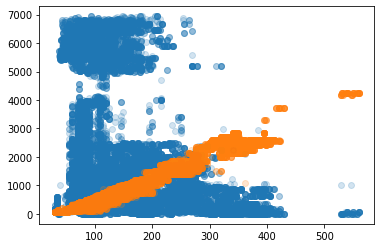

In [ ]:
# 산점도
plt.scatter(data2['duration'], data2['flight'], alpha = 0.2)
plt.scatter(data2['duration'], data2['mile'], alpha = 0.2)
plt.show()

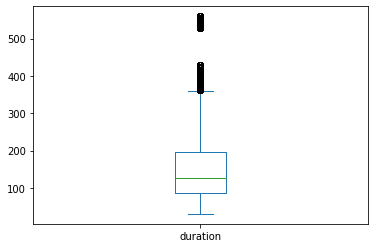

In [ ]:
# 박스플롯
data2['duration'].plot(kind='box')
plt.show()

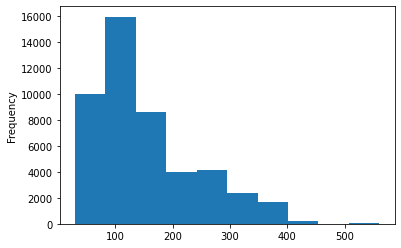

In [ ]:
# 히스토그램
data2['duration'].plot(kind='hist')
plt.show()

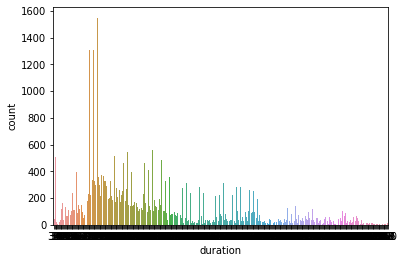

In [ ]:
# 막대그래프
sns.countplot(data=data2, x="duration")
plt.show()

---

## Step 5. Spark Feature Enginnering
- flgiths 데이터를 활용하여 각 조건에 맞추어 Feature Engineering을 진행한다. 

- 조건 1. 결측치 및 컬럼 제거
  + 결측치 제거
  + flight 컬럼 제거

In [ ]:
# 결측치 제거
print((flights.count(), len(flights.columns)))

(50000, 10)


In [ ]:
flights2 = flights.dropna()
print((flights2.count(), len(flights2.columns)))

(47022, 10)


In [ ]:
# flight 컬럼 제거
flights3 = flights2.drop('flight')
print((flights3.count(), len(flights3.columns)))

(47022, 9)


- 조건 2. km 컬럼 생성
  + miles로 된 컬럼을 km으로 변경하도록 한다. 대신, mile 컬럼은 제거한다. 

In [ ]:
from pyspark.sql.functions import round

flights4 = flights3.withColumn('km', round(flights3.mile * 1.60934, 0)).drop('mile')
print((flights4.count(), len(flights4.columns)))
print(flights4.show(6))

(47022, 9)
+---+---+---+-------+---+------+--------+-----+------+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|
+---+---+---+-------+---+------+--------+-----+------+
|  0| 22|  2|     UA|ORD| 16.33|      82|   30| 509.0|
|  2| 20|  4|     UA|SFO|  6.17|      82|   -8| 542.0|
|  9| 13|  1|     AA|ORD| 10.33|     195|   -5|1989.0|
|  5|  2|  1|     UA|SFO|  7.98|     102|    2| 885.0|
|  7|  2|  6|     AA|ORD| 10.83|     135|   54|1180.0|
|  1| 16|  6|     UA|ORD|   8.0|     232|   -7|2317.0|
+---+---+---+-------+---+------+--------+-----+------+
only showing top 6 rows

None


- 조건 3. 원핫인코딩
  + carrier와 org 컬럼은 모두 문자열이다. 

In [ ]:
from pyspark.ml.feature import StringIndexer

# idx칼럼 변환
carrier_indexer = StringIndexer(inputCol='carrier', outputCol='carrier_idx')
carrier_indexer_model = carrier_indexer.fit(flights4)

org_indexer = StringIndexer(inputCol='org', outputCol='org_idx')
org_indexer_model = org_indexer.fit(flights4)

flights5 = carrier_indexer_model.transform(flights4)
flights5 = org_indexer_model.transform(flights5)

print((flights5.count(), len(flights5.columns)))
print(flights5.show(6))

(47022, 11)
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|carrier_idx|org_idx|
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+
|  0| 22|  2|     UA|ORD| 16.33|      82|   30| 509.0|        0.0|    0.0|
|  2| 20|  4|     UA|SFO|  6.17|      82|   -8| 542.0|        0.0|    1.0|
|  9| 13|  1|     AA|ORD| 10.33|     195|   -5|1989.0|        1.0|    0.0|
|  5|  2|  1|     UA|SFO|  7.98|     102|    2| 885.0|        0.0|    1.0|
|  7|  2|  6|     AA|ORD| 10.83|     135|   54|1180.0|        1.0|    0.0|
|  1| 16|  6|     UA|ORD|   8.0|     232|   -7|2317.0|        0.0|    0.0|
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+
only showing top 6 rows

None


In [ ]:
from pyspark.ml.feature import OneHotEncoder

# dummy칼럼 변환
org_onehot = OneHotEncoder(inputCols=['org_idx'], outputCols=['org_dummy'])
org_onehot = org_onehot.fit(flights5)
flights6 = org_onehot.transform(flights5)

carrier_onehot = OneHotEncoder(inputCols=['carrier_idx'], outputCols=['carrier_dummy'])
carrier_onehot = carrier_onehot.fit(flights6)
flights6 = carrier_onehot.transform(flights6)


print((flights6.count(), len(flights6.columns)))
print(flights6.show(6))

(47022, 13)
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+-------------+-------------+
|mon|dom|dow|carrier|org|depart|duration|delay|    km|carrier_idx|org_idx|    org_dummy|carrier_dummy|
+---+---+---+-------+---+------+--------+-----+------+-----------+-------+-------------+-------------+
|  0| 22|  2|     UA|ORD| 16.33|      82|   30| 509.0|        0.0|    0.0|(7,[0],[1.0])|(8,[0],[1.0])|
|  2| 20|  4|     UA|SFO|  6.17|      82|   -8| 542.0|        0.0|    1.0|(7,[1],[1.0])|(8,[0],[1.0])|
|  9| 13|  1|     AA|ORD| 10.33|     195|   -5|1989.0|        1.0|    0.0|(7,[0],[1.0])|(8,[1],[1.0])|
|  5|  2|  1|     UA|SFO|  7.98|     102|    2| 885.0|        0.0|    1.0|(7,[1],[1.0])|(8,[0],[1.0])|
|  7|  2|  6|     AA|ORD| 10.83|     135|   54|1180.0|        1.0|    0.0|(7,[0],[1.0])|(8,[1],[1.0])|
|  1| 16|  6|     UA|ORD|   8.0|     232|   -7|2317.0|        0.0|    0.0|(7,[0],[1.0])|(8,[0],[1.0])|
+---+---+---+-------+---+------+--------+-----+------+-------

- 조건 4. 중요 컬럼만 취합하여 행렬로 변환하는 코드를 작성한다.
  + 이 때, carrier와 org는 선택하지 않는다. 

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=[
    'mon', 'dom', 'dow', 'org_dummy', 'carrier_dummy', 'km', 'depart', 'delay'
], outputCol='features')

flights7 = assembler.transform(flights6)

flights7.select('features', 'duration').show(5, truncate=False)

+-------------------------------------------------------------------+--------+
|features                                                           |duration|
+-------------------------------------------------------------------+--------+
|(21,[1,2,3,10,18,19,20],[22.0,2.0,1.0,1.0,509.0,16.33,30.0])       |82      |
|(21,[0,1,2,4,10,18,19,20],[2.0,20.0,4.0,1.0,1.0,542.0,6.17,-8.0])  |82      |
|(21,[0,1,2,3,11,18,19,20],[9.0,13.0,1.0,1.0,1.0,1989.0,10.33,-5.0])|195     |
|(21,[0,1,2,4,10,18,19,20],[5.0,2.0,1.0,1.0,1.0,885.0,7.98,2.0])    |102     |
|(21,[0,1,2,3,11,18,19,20],[7.0,2.0,6.0,1.0,1.0,1180.0,10.83,54.0]) |135     |
+-------------------------------------------------------------------+--------+
only showing top 5 rows



---

## Step 6. PySpark 머신러닝 모형 개발
- 조건 1. PySpark 라이브러리를 활용하여 훈련 데이터와 테스트 데이터로 나누는 코드를 작성한다.
  + scikit-learn 라이브러리 사용 안됨. 

In [ ]:
# 학습/테스트 셋
flights_train, flights_test = flights7.randomSplit([0.8, 0.2], seed=43)

# 비율 확인
training_ratio = flights_train.count() / flights.count()
print(training_ratio)

0.75474


- 조건 2. 선형회귀 모형 개발
  + 실제값과 예측값 각 5개가 포함되도록 한다. 

In [ ]:
from pyspark.ml.regression import LinearRegression

# 선형회귀 모형 개발
regression = LinearRegression(labelCol='duration').fit(flights_train)
predictions = regression.transform(flights_test)

# 실제값 예측값 5개
predictions.select('duration', 'prediction').show(5, False)

+--------+------------------+
|duration|prediction        |
+--------+------------------+
|230     |259.8305924767669 |
|250     |226.92216539023866|
|170     |148.1840828629919 |
|251     |239.66737081972488|
|155     |137.81512059388567|
+--------+------------------+
only showing top 5 rows



- 조건 3. RMSE 평가지표 활용

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
RegressionEvaluator(labelCol='duration').evaluate(predictions)

10.891781129099007